# Visualisasi Perkembangan Kasus Covid19 pada Provinsi Indonesia

## Objective
* Melakukan EDA
* Membuat visualisasi Data  

In [50]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Import Library yang digunakan

In [1]:
!pip install names

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
!pip install matplotlib==3.5.3

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
import pandas as pd #>mengolah dataframe/csv/tabel
import matplotlib.pyplot as plt
import matplotlib.dates as dates
import numpy as np #>mengolah data berbetuk array
from time import time
import datetime #mengolah data yg berbentuk waktu
from datetime import date
import missingno as msn

# import library
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
from matplotlib import rcParams
import matplotlib.style as style

import seaborn as sns

import scipy
from scipy import stats
import scipy.stats as stats
from scipy.stats import kstest
from scipy.stats import norm

import math
import scipy.stats as st
import statsmodels.stats.proportion as sp
import random

import names
import datetime 
from datetime import datetime
from datetime import date

print('numpy version : ',np.__version__)
print('pandas version : ',pd.__version__)
print('seaborn version : ',sns.__version__)
print('matplotlib version : ',matplotlib.__version__)
print('scipy version : ',scipy.__version__)
print('names version : ',names.__version__)

numpy version :  1.21.6
pandas version :  1.3.5
seaborn version :  0.11.2
matplotlib version :  3.5.3
scipy version :  1.7.3
names version :  0.3.0


#Loading Dataset

In [4]:
#covid 19
covid_data = pd.read_csv('/content/drive/MyDrive/Dokumentasi Proyek/Intelligo/Dataset Proyek/covid_19_indonesia_time_series_all.csv')

In [5]:
covid_data

,Date,Location ISO Code,Location,New Cases,New Deaths,New Recovered,New Active Cases,Total Cases,Total Deaths,Total Recovered,...,Latitude,New Cases per Million,Total Cases per Million,New Deaths per Million,Total Deaths per Million,Total Deaths per 100rb,Case Fatality Rate,Case Recovered Rate,Growth Factor of New Cases,Growth Factor of New Deaths
0,3/1/2020,ID-JK,DKI Jakarta,2,0,0,2,39,20,41,...,-6.204699,0.18,3.60,0.00,1.84,0.18,51.28%,105.13%,NaN,NaN
1,3/2/2020,ID-JK,DKI Jakarta,2,0,0,2,41,20,41,...,-6.204699,0.18,3.78,0.00,1.84,0.18,48.78%,100.00%,1.00,1.0
2,3/2/2020,IDN,Indonesia,2,0,0,2,2,0,0,...,-0.789275,0.01,0.01,0.00,0.00,0.00,0.00%,0.00%,NaN,NaN
3,3/2/2020,ID-RI,Riau,1,0,0,1,2,0,3,...,0.511648,0.16,0.33,0.00,0.00,0.00,0.00%,150.00%,NaN,NaN
4,3/3/2020,ID-JK,DKI Jakarta,2,0,0,2,43,20,41,...,-6.204699,0.18,3.96,0.00,1.84,0.18,46.51%,95.35%,1.00,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21754,12/2/2021,ID-SA,Sulawesi Utara,2,0,0,2,34715,1056,33566,...,1.259638,0.76,13140.24,0.00,399.71,39.97,3.04%,96.69%,NaN,1.0
21755,12/2/2021,ID-SB,Sumatera Barat,4,0,0,4,89849,2152,87605,...,-0.850253,0.72,16279.22,0.00,389.91,38.99,2.40%,97.50%,4.00,1.0
21756,12/2/2021,ID-SS,Sumatera Selatan,4,0,0,4,59937,3071,56830,...,-3.216212,0.49,7293.78,0.00,373.71,37.37,5.12%,94.82%,4.00,1.0
21757,12/2/2021,ID-SU,Sumatera Utara,4,0,1,3,106045,2889,103061,...,2.191894,0.27,7129.13,0.00,194.22,19.42,2.72%,97.19%,1.00,1.0


In [6]:
covid_data.shape

(21759, 38)

In [7]:
covid_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21759 entries, 0 to 21758
Data columns (total 38 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Date                         21759 non-null  object 
 1   Location ISO Code            21759 non-null  object 
 2   Location                     21759 non-null  object 
 3   New Cases                    21759 non-null  int64  
 4   New Deaths                   21759 non-null  int64  
 5   New Recovered                21759 non-null  int64  
 6   New Active Cases             21759 non-null  int64  
 7   Total Cases                  21759 non-null  int64  
 8   Total Deaths                 21759 non-null  int64  
 9   Total Recovered              21759 non-null  int64  
 10  Total Active Cases           21759 non-null  int64  
 11  Location Level               21759 non-null  object 
 12  City or Regency              0 non-null      float64
 13  Province        

<AxesSubplot:>

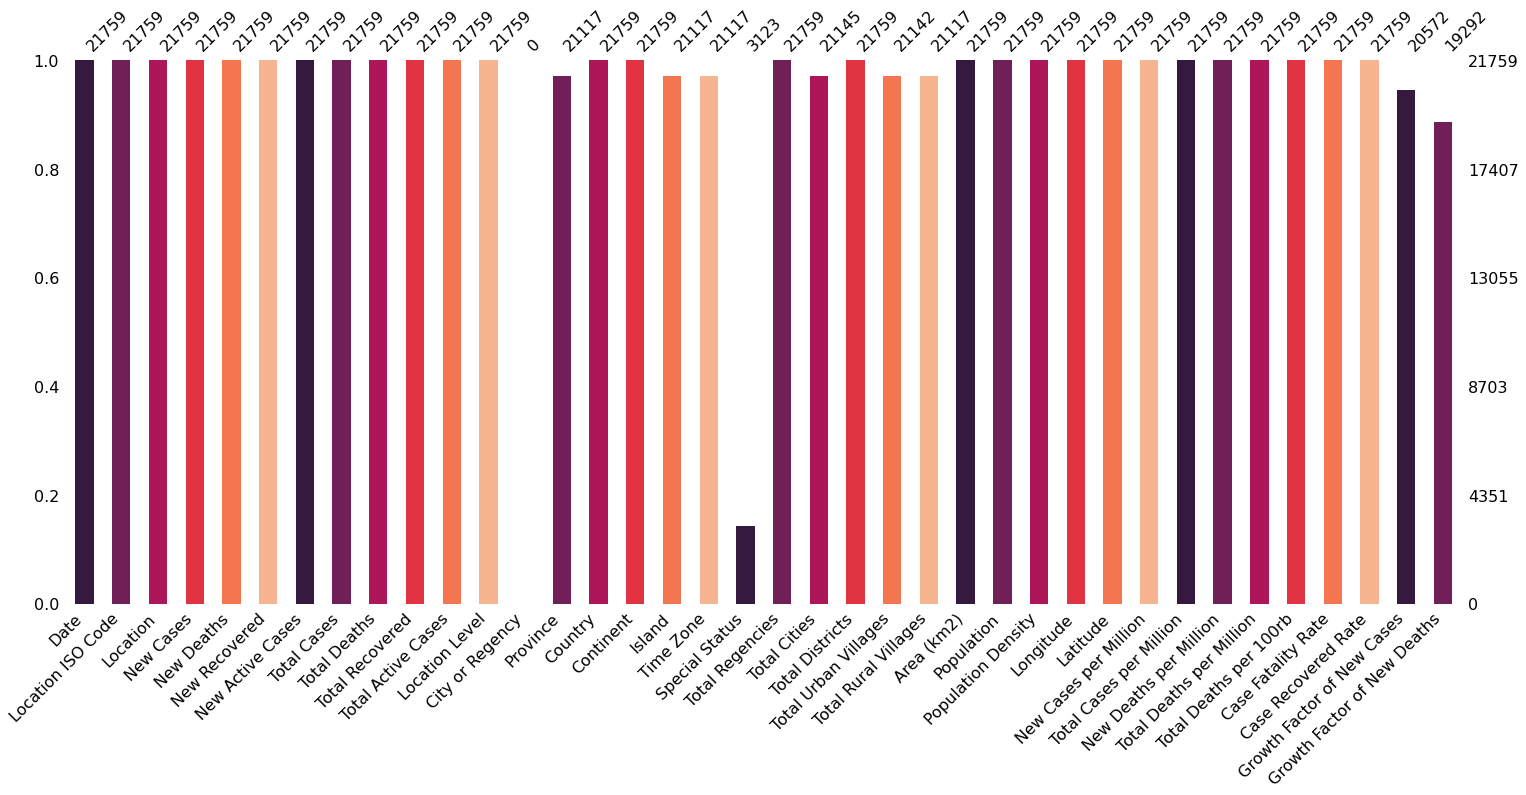

In [8]:
plt.figure(figsize=(12,8))
msn.bar(covid_data,color=sns.color_palette("rocket"))

In [9]:
#calculate missing value in percentage
data_missing_value = covid_data.isnull().sum().reset_index()
data_missing_value.columns = ['feature','missing_value']
data_missing_value['percentage'] = round((data_missing_value['missing_value']/len(covid_data))*100,4)
data_missing_value = data_missing_value.sort_values('percentage',ascending=False).reset_index(drop=True)
data_missing_value = data_missing_value[data_missing_value['percentage']>0]
data_missing_value

,feature,missing_value,percentage
0,City or Regency,21759,100.0000
1,Special Status,18636,85.6473
2,Growth Factor of New Deaths,2467,11.3378
3,Growth Factor of New Cases,1187,5.4552
4,Time Zone,642,2.9505
5,Island,642,2.9505
6,Province,642,2.9505
7,Total Rural Villages,642,2.9505
8,Total Urban Villages,617,2.8356
9,Total Cities,614,2.8218


In [10]:
covid_data.columns

Index(['Date', 'Location ISO Code', 'Location', 'New Cases', 'New Deaths',
       'New Recovered', 'New Active Cases', 'Total Cases', 'Total Deaths',
       'Total Recovered', 'Total Active Cases', 'Location Level',
       'City or Regency', 'Province', 'Country', 'Continent', 'Island',
       'Time Zone', 'Special Status', 'Total Regencies', 'Total Cities',
       'Total Districts', 'Total Urban Villages', 'Total Rural Villages',
       'Area (km2)', 'Population', 'Population Density', 'Longitude',
       'Latitude', 'New Cases per Million', 'Total Cases per Million',
       'New Deaths per Million', 'Total Deaths per Million',
       'Total Deaths per 100rb', 'Case Fatality Rate', 'Case Recovered Rate',
       'Growth Factor of New Cases', 'Growth Factor of New Deaths'],
      dtype='object')

In [11]:
hapus = ['City or Regency', 'Special Status', 'Growth Factor of New Cases', 'Growth Factor of New Deaths']

data = covid_data.drop(columns=hapus)
data = data.fillna(0)
data.head()


,Date,Location ISO Code,Location,New Cases,New Deaths,New Recovered,New Active Cases,Total Cases,Total Deaths,Total Recovered,...,Population Density,Longitude,Latitude,New Cases per Million,Total Cases per Million,New Deaths per Million,Total Deaths per Million,Total Deaths per 100rb,Case Fatality Rate,Case Recovered Rate
0,3/1/2020,ID-JK,DKI Jakarta,2,0,0,2,39,20,41,...,16334.31,106.836118,-6.204699,0.18,3.60,0.0,1.84,0.18,51.28%,105.13%
1,3/2/2020,ID-JK,DKI Jakarta,2,0,0,2,41,20,41,...,16334.31,106.836118,-6.204699,0.18,3.78,0.0,1.84,0.18,48.78%,100.00%
2,3/2/2020,IDN,Indonesia,2,0,0,2,2,0,0,...,138.34,113.921327,-0.789275,0.01,0.01,0.0,0.00,0.00,0.00%,0.00%
3,3/2/2020,ID-RI,Riau,1,0,0,1,2,0,3,...,69.80,101.805109,0.511648,0.16,0.33,0.0,0.00,0.00,0.00%,150.00%
4,3/3/2020,ID-JK,DKI Jakarta,2,0,0,2,43,20,41,...,16334.31,106.836118,-6.204699,0.18,3.96,0.0,1.84,0.18,46.51%,95.35%


In [12]:
data.isna().sum()

Date                        0
Location ISO Code           0
Location                    0
New Cases                   0
New Deaths                  0
New Recovered               0
New Active Cases            0
Total Cases                 0
Total Deaths                0
Total Recovered             0
Total Active Cases          0
Location Level              0
Province                    0
Country                     0
Continent                   0
Island                      0
Time Zone                   0
Total Regencies             0
Total Cities                0
Total Districts             0
Total Urban Villages        0
Total Rural Villages        0
Area (km2)                  0
Population                  0
Population Density          0
Longitude                   0
Latitude                    0
New Cases per Million       0
Total Cases per Million     0
New Deaths per Million      0
Total Deaths per Million    0
Total Deaths per 100rb      0
Case Fatality Rate          0
Case Recov

In [13]:
#menampilkan data covid yang ada di indonesia(provisi)

cleaned_data = data[data['Location Level']!='Country']
cleaned_data.head()

,Date,Location ISO Code,Location,New Cases,New Deaths,New Recovered,New Active Cases,Total Cases,Total Deaths,Total Recovered,...,Population Density,Longitude,Latitude,New Cases per Million,Total Cases per Million,New Deaths per Million,Total Deaths per Million,Total Deaths per 100rb,Case Fatality Rate,Case Recovered Rate
0,3/1/2020,ID-JK,DKI Jakarta,2,0,0,2,39,20,41,...,16334.31,106.836118,-6.204699,0.18,3.60,0.00,1.84,0.18,51.28%,105.13%
1,3/2/2020,ID-JK,DKI Jakarta,2,0,0,2,41,20,41,...,16334.31,106.836118,-6.204699,0.18,3.78,0.00,1.84,0.18,48.78%,100.00%
3,3/2/2020,ID-RI,Riau,1,0,0,1,2,0,3,...,69.80,101.805109,0.511648,0.16,0.33,0.00,0.00,0.00,0.00%,150.00%
4,3/3/2020,ID-JK,DKI Jakarta,2,0,0,2,43,20,41,...,16334.31,106.836118,-6.204699,0.18,3.96,0.00,1.84,0.18,46.51%,95.35%
6,3/3/2020,ID-JB,Jawa Barat,1,1,0,0,1,1,8,...,1276.55,107.603708,-6.920432,0.02,0.02,0.02,0.02,0.00,100.00%,800.00%


In [14]:
newest = cleaned_data.drop_duplicates(subset='Location', keep='last' )

In [15]:
newest

,Date,Location ISO Code,Location,New Cases,New Deaths,New Recovered,New Active Cases,Total Cases,Total Deaths,Total Recovered,...,Population Density,Longitude,Latitude,New Cases per Million,Total Cases per Million,New Deaths per Million,Total Deaths per Million,Total Deaths per 100rb,Case Fatality Rate,Case Recovered Rate
21364,11/21/2021,ID-GO,Gorontalo,1,0,0,1,11834,460,11374,...,104.88,122.376058,0.687003,0.85,10023.28,0.00,389.62,38.96,3.89%,96.11%
21617,11/28/2021,ID-MU,Maluku Utara,2,0,3,-1,12101,303,11757,...,40.89,127.539107,0.212037,1.53,9252.92,0.00,231.69,23.17,2.50%,97.16%
21700,12/1/2021,ID-BE,Bengkulu,1,0,0,1,23104,473,22612,...,100.38,102.338421,-3.533584,0.50,11554.66,0.00,236.55,23.66,2.05%,97.87%
21712,12/1/2021,ID-KU,Kalimantan Utara,1,0,0,1,35885,811,35039,...,8.59,116.218879,2.891013,1.54,55343.33,0.00,1250.76,125.08,2.26%,97.64%
21714,12/1/2021,ID-KR,Kepulauan Riau,2,0,0,2,53884,1748,52120,...,235.24,108.261746,3.916346,1.04,27927.85,0.00,905.98,90.60,3.24%,96.73%
21716,12/1/2021,ID-MA,Maluku,1,0,0,1,14587,261,14310,...,39.37,129.576792,-3.192572,0.54,7897.26,0.00,141.30,14.13,1.79%,98.10%
21722,12/1/2021,ID-SR,Sulawesi Barat,1,0,0,1,12353,346,12001,...,92.93,119.345019,-2.461746,0.64,7918.67,0.00,221.80,22.18,2.80%,97.15%
21730,12/2/2021,ID-AC,Aceh,2,0,0,2,38416,2066,36333,...,90.54,96.910522,4.225615,0.38,7321.16,0.00,393.73,39.37,5.38%,94.58%
21731,12/2/2021,ID-BA,Bali,15,1,1,13,114233,4046,110003,...,729.43,115.131714,-8.369472,3.56,27094.01,0.24,959.64,95.96,3.54%,96.30%
21732,12/2/2021,ID-BT,Banten,16,0,1,15,132693,2688,129872,...,1109.64,106.109004,-6.456736,1.49,12375.34,0.00,250.69,25.07,2.03%,97.87%


In [16]:
viz_prov = newest[newest.Location != 'Indonesia'].sort_values(by=['Total Cases'], ascending=False)
viz_prov

,Date,Location ISO Code,Location,New Cases,New Deaths,New Recovered,New Active Cases,Total Cases,Total Deaths,Total Recovered,...,Population Density,Longitude,Latitude,New Cases per Million,Total Cases per Million,New Deaths per Million,Total Deaths per Million,Total Deaths per 100rb,Case Fatality Rate,Case Recovered Rate
21733,12/2/2021,ID-JK,DKI Jakarta,28,0,0,28,864045,13596,849875,...,16334.31,106.836118,-6.204699,2.58,79663.79,0.00,1253.53,125.35,1.57%,98.36%
21737,12/2/2021,ID-JB,Jawa Barat,83,0,6,77,707934,14737,692101,...,1276.55,107.603708,-6.920432,1.84,15675.67,0.00,326.32,32.63,2.08%,97.76%
21738,12/2/2021,ID-JT,Jawa Tengah,30,1,6,23,486435,30225,454837,...,1108.64,110.201115,-7.259097,0.82,13376.80,0.03,831.18,83.12,6.21%,93.50%
21739,12/2/2021,ID-JI,Jawa Timur,35,0,11,24,399478,29697,369537,...,846.78,112.732941,-7.723346,0.86,9868.77,0.00,733.64,73.36,7.43%,92.50%
21743,12/2/2021,ID-KI,Kalimantan Timur,7,0,2,5,158245,5449,152714,...,27.52,116.468440,0.453858,1.97,44548.56,0.00,1533.98,153.40,3.44%,96.50%
21734,12/2/2021,ID-YO,Daerah Istimewa Yogyakarta,7,0,0,7,156769,5263,150965,...,1158.90,110.444878,-7.894502,1.93,43174.98,0.00,1449.46,144.95,3.36%,96.30%
21732,12/2/2021,ID-BT,Banten,16,0,1,15,132693,2688,129872,...,1109.64,106.109004,-6.456736,1.49,12375.34,0.00,250.69,25.07,2.03%,97.87%
21750,12/2/2021,ID-RI,Riau,4,0,0,4,128825,4109,124123,...,69.80,101.805109,0.511648,0.66,21208.90,0.00,676.48,67.65,3.19%,96.35%
21731,12/2/2021,ID-BA,Bali,15,1,1,13,114233,4046,110003,...,729.43,115.131714,-8.369472,3.56,27094.01,0.24,959.64,95.96,3.54%,96.30%
21751,12/2/2021,ID-SN,Sulawesi Selatan,1,1,1,-1,109919,2238,107630,...,201.78,120.162056,-3.731081,0.11,11660.16,0.11,237.41,23.74,2.04%,97.92%


Text(-1, 940000, 'Sehingga hal ini perlu menjadi perhatian khusus bagi pemerintah untuk mengambil kebijakan yang tepat dalam penanganan kasus Covid di 5 Provinsi ini')

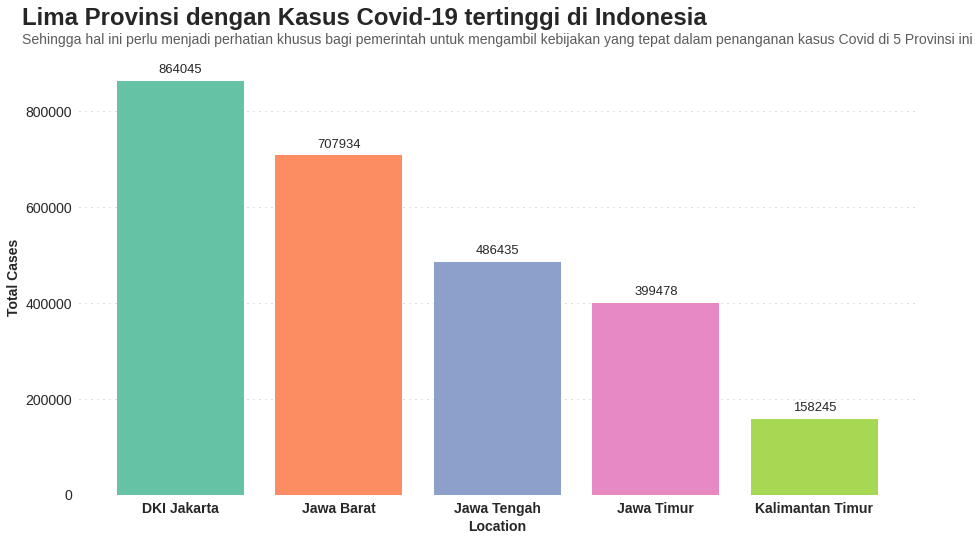

In [17]:
style.use('seaborn')
x = viz_prov['Location'].values[:5]
y = viz_prov['Total Cases'].values[:5]
labels = list(viz_prov['Location'].values[:5])

fig, ax = plt.subplots(figsize=(15,8))
rects1 = ax.bar(x,y,color=sns.color_palette("Set2"))
ax.grid(which="major", axis="y", zorder=0, color="gray", linestyle=":", dashes=(1, 5), alpha=0.5,) 
ax.set_facecolor('white') 
ax.set_xticks(x)
ax.set_xticklabels(labels, fontsize=14,fontweight='bold')
ax.set_xlabel('Location', fontsize=14, fontweight='bold')

ax.bar_label(ax.containers[0], fontsize=13, padding=5)
plt.yticks(fontsize=14)
ax.set_ylabel('Total Cases', fontsize=14,fontweight='bold')

plt.text(x = -1, y = 980000, s = "Lima Provinsi dengan Kasus Covid-19 tertinggi di Indonesia ",
               fontsize = 24, weight = 'bold')
plt.text(x = -1, y = 940000, s = "Sehingga hal ini perlu menjadi perhatian khusus bagi pemerintah untuk mengambil kebijakan yang tepat dalam penanganan kasus Covid di 5 Provinsi ini",
               fontsize = 14, alpha = .75)

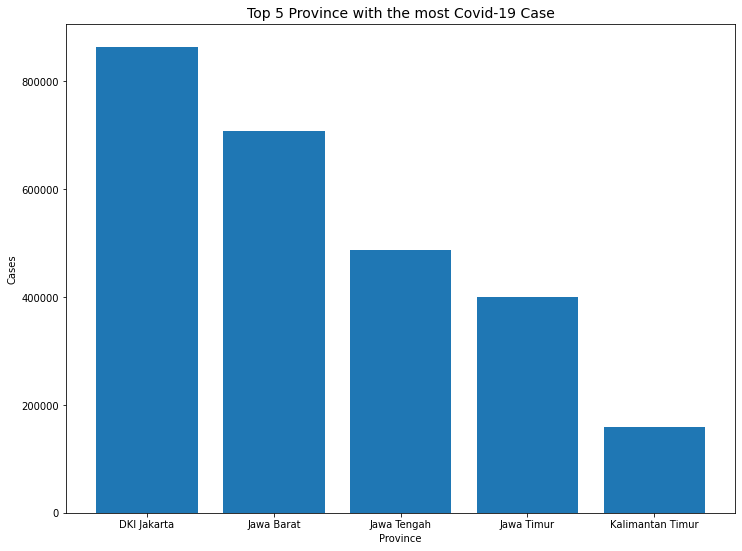

In [ ]:
#Top 5 province with the most COVID-19 case 
plt.figure(figsize=(12,9))
plt.bar(newest[newest.Location != 'Indonesia'].sort_values(by=['Total Cases'], ascending=False)['Location'].values[:5], newest[newest.Location != 'Indonesia'].sort_values(by=['Total Cases'], ascending=False)['Total Cases'].values[:5])
plt.title('Top 5 Province with the most Covid-19 Case', fontsize=14)
plt.xlabel('Province')
plt.ylabel('Cases')
plt.show()

In [18]:
viz_prov1 = newest[newest.Location != 'Indonesia'].sort_values(by=['Total Deaths'], ascending=False)
viz_prov1

,Date,Location ISO Code,Location,New Cases,New Deaths,New Recovered,New Active Cases,Total Cases,Total Deaths,Total Recovered,...,Population Density,Longitude,Latitude,New Cases per Million,Total Cases per Million,New Deaths per Million,Total Deaths per Million,Total Deaths per 100rb,Case Fatality Rate,Case Recovered Rate
21738,12/2/2021,ID-JT,Jawa Tengah,30,1,6,23,486435,30225,454837,...,1108.64,110.201115,-7.259097,0.82,13376.80,0.03,831.18,83.12,6.21%,93.50%
21739,12/2/2021,ID-JI,Jawa Timur,35,0,11,24,399478,29697,369537,...,846.78,112.732941,-7.723346,0.86,9868.77,0.00,733.64,73.36,7.43%,92.50%
21737,12/2/2021,ID-JB,Jawa Barat,83,0,6,77,707934,14737,692101,...,1276.55,107.603708,-6.920432,1.84,15675.67,0.00,326.32,32.63,2.08%,97.76%
21733,12/2/2021,ID-JK,DKI Jakarta,28,0,0,28,864045,13596,849875,...,16334.31,106.836118,-6.204699,2.58,79663.79,0.00,1253.53,125.35,1.57%,98.36%
21743,12/2/2021,ID-KI,Kalimantan Timur,7,0,2,5,158245,5449,152714,...,27.52,116.468440,0.453858,1.97,44548.56,0.00,1533.98,153.40,3.44%,96.50%
21734,12/2/2021,ID-YO,Daerah Istimewa Yogyakarta,7,0,0,7,156769,5263,150965,...,1158.90,110.444878,-7.894502,1.93,43174.98,0.00,1449.46,144.95,3.36%,96.30%
21750,12/2/2021,ID-RI,Riau,4,0,0,4,128825,4109,124123,...,69.80,101.805109,0.511648,0.66,21208.90,0.00,676.48,67.65,3.19%,96.35%
21731,12/2/2021,ID-BA,Bali,15,1,1,13,114233,4046,110003,...,729.43,115.131714,-8.369472,3.56,27094.01,0.24,959.64,95.96,3.54%,96.30%
21745,12/2/2021,ID-LA,Lampung,2,0,0,2,49691,3866,45271,...,262.70,105.021437,-4.916793,0.22,5463.20,0.00,425.04,42.50,7.78%,91.11%
21756,12/2/2021,ID-SS,Sumatera Selatan,4,0,0,4,59937,3071,56830,...,89.72,104.169465,-3.216212,0.49,7293.78,0.00,373.71,37.37,5.12%,94.82%


Text(-1, 35400, 'Sehingga hal ini perlu menjadi perhatian khusus bagi pemerintah untuk mengambil kebijakan yang tepat dalam penanganan kasus Covid di 5 Provinsi ini')

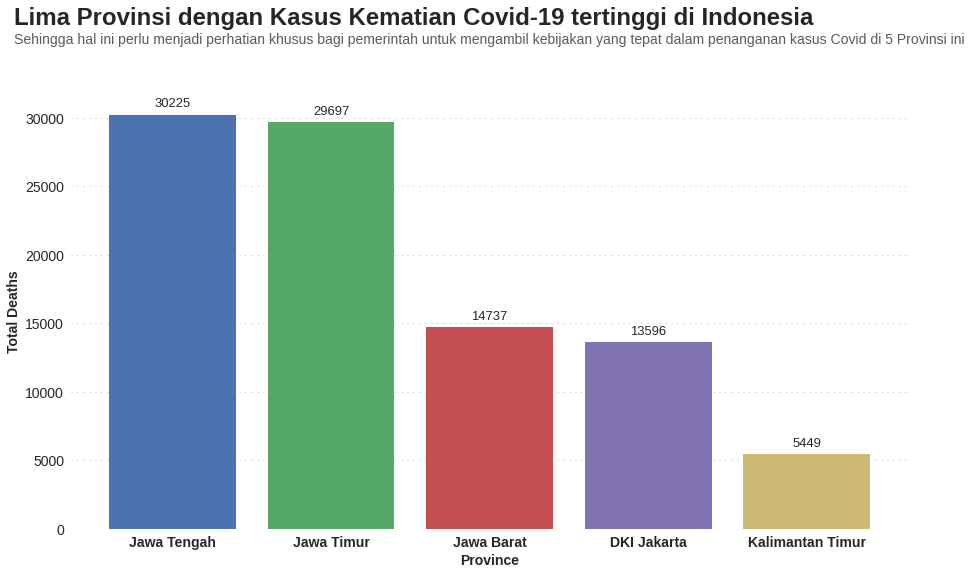

In [19]:
import seaborn as sns
style.use('seaborn')
x = viz_prov1['Location'].values[:5]
y = viz_prov1['Total Deaths'].values[:5]
labels = list(viz_prov1['Location'].values[:5])

fig, ax = plt.subplots(figsize=(15,8))
rects1 = ax.bar(x,y,color=sns.color_palette())
ax.grid(which="major", axis="y", zorder=0, color="gray", linestyle=":", dashes=(1, 5), alpha=0.5,) 
ax.set_facecolor('white') 
ax.set_xticks(x)
ax.set_xticklabels(labels, fontsize=14,fontweight='bold')
ax.set_xlabel('Province', fontsize=14, fontweight='bold')

ax.bar_label(ax.containers[0], fontsize=13, padding=5)
plt.yticks(fontsize=14)
ax.set_ylabel('Total Deaths', fontsize=14,fontweight='bold')

plt.text(x = -1, y = 36800, s = "Lima Provinsi dengan Kasus Kematian Covid-19 tertinggi di Indonesia ",
               fontsize = 24, weight = 'bold')
plt.text(x = -1, y = 35400, s = "Sehingga hal ini perlu menjadi perhatian khusus bagi pemerintah untuk mengambil kebijakan yang tepat dalam penanganan kasus Covid di 5 Provinsi ini",
               fontsize = 14, alpha = .75)

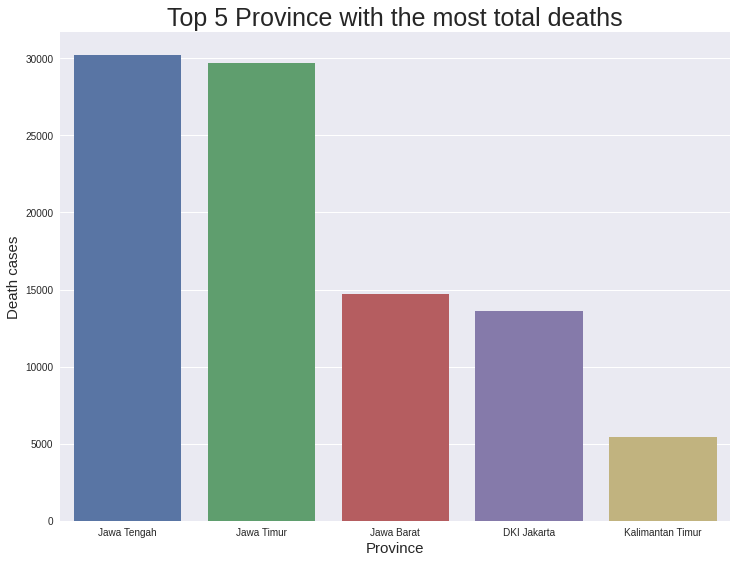

In [20]:
# Top 5 provinces with the most number of Deaths 
import seaborn as sns
plt.figure(figsize=(12,9))
sns.barplot(newest[newest.Location != 'Indonesia'].sort_values(by=['Total Deaths'], ascending=False)['Location'].values[:5],  newest[newest.Location != 'Indonesia'].sort_values(by=['Total Deaths'], ascending=False)['Total Deaths'].values[:5])
plt.title('Top 5 Province with the most total deaths', fontsize=25)
plt.xlabel('Province', fontsize=15)
plt.ylabel('Death cases', fontsize=15)
plt.show()

In [21]:
viz_prov2 = newest[newest.Location != 'Indonesia'].sort_values(by=['Total Recovered'], ascending=False)
viz_prov2

,Date,Location ISO Code,Location,New Cases,New Deaths,New Recovered,New Active Cases,Total Cases,Total Deaths,Total Recovered,...,Population Density,Longitude,Latitude,New Cases per Million,Total Cases per Million,New Deaths per Million,Total Deaths per Million,Total Deaths per 100rb,Case Fatality Rate,Case Recovered Rate
21733,12/2/2021,ID-JK,DKI Jakarta,28,0,0,28,864045,13596,849875,...,16334.31,106.836118,-6.204699,2.58,79663.79,0.00,1253.53,125.35,1.57%,98.36%
21737,12/2/2021,ID-JB,Jawa Barat,83,0,6,77,707934,14737,692101,...,1276.55,107.603708,-6.920432,1.84,15675.67,0.00,326.32,32.63,2.08%,97.76%
21738,12/2/2021,ID-JT,Jawa Tengah,30,1,6,23,486435,30225,454837,...,1108.64,110.201115,-7.259097,0.82,13376.80,0.03,831.18,83.12,6.21%,93.50%
21739,12/2/2021,ID-JI,Jawa Timur,35,0,11,24,399478,29697,369537,...,846.78,112.732941,-7.723346,0.86,9868.77,0.00,733.64,73.36,7.43%,92.50%
21743,12/2/2021,ID-KI,Kalimantan Timur,7,0,2,5,158245,5449,152714,...,27.52,116.468440,0.453858,1.97,44548.56,0.00,1533.98,153.40,3.44%,96.50%
21734,12/2/2021,ID-YO,Daerah Istimewa Yogyakarta,7,0,0,7,156769,5263,150965,...,1158.90,110.444878,-7.894502,1.93,43174.98,0.00,1449.46,144.95,3.36%,96.30%
21732,12/2/2021,ID-BT,Banten,16,0,1,15,132693,2688,129872,...,1109.64,106.109004,-6.456736,1.49,12375.34,0.00,250.69,25.07,2.03%,97.87%
21750,12/2/2021,ID-RI,Riau,4,0,0,4,128825,4109,124123,...,69.80,101.805109,0.511648,0.66,21208.90,0.00,676.48,67.65,3.19%,96.35%
21731,12/2/2021,ID-BA,Bali,15,1,1,13,114233,4046,110003,...,729.43,115.131714,-8.369472,3.56,27094.01,0.24,959.64,95.96,3.54%,96.30%
21751,12/2/2021,ID-SN,Sulawesi Selatan,1,1,1,-1,109919,2238,107630,...,201.78,120.162056,-3.731081,0.11,11660.16,0.11,237.41,23.74,2.04%,97.92%


Text(-1, 940000, 'Hal ini menandakan pelaksanaan peraturan yang diberlakukan serta tingkat kepatuhan masyasarakat di provinsi tersebut cukup baik')

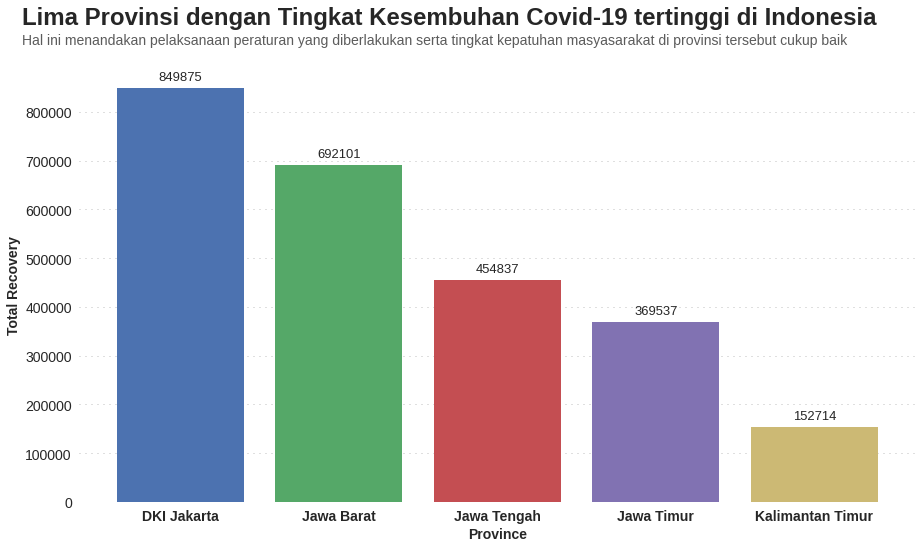

In [22]:
import seaborn as sns
style.use('seaborn')
x = viz_prov2['Location'].values[:5]
y = viz_prov2['Total Recovered'].values[:5]
labels = list(viz_prov2['Location'].values[:5])

fig, ax = plt.subplots(figsize=(15,8))
rects1 = ax.bar(x,y,color=sns.color_palette())
ax.grid(which="major", axis="y", zorder=0, color="gray", linestyle=":", dashes=(1, 5), alpha=0.5,) 
ax.set_facecolor('white') 
ax.set_xticks(x)
ax.set_xticklabels(labels, fontsize=14,fontweight='bold')
ax.set_xlabel('Province', fontsize=14, fontweight='bold')

ax.bar_label(ax.containers[0], fontsize=13, padding=5)
plt.yticks(fontsize=14)
ax.set_ylabel('Total Recovery', fontsize=14,fontweight='bold')

plt.text(x = -1, y = 980000, s = "Lima Provinsi dengan Tingkat Kesembuhan Covid-19 tertinggi di Indonesia ",
               fontsize = 24, weight = 'bold')
plt.text(x = -1, y = 940000, s = "Hal ini menandakan pelaksanaan peraturan yang diberlakukan serta tingkat kepatuhan masyasarakat di provinsi tersebut cukup baik",
               fontsize = 14, alpha = .75)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


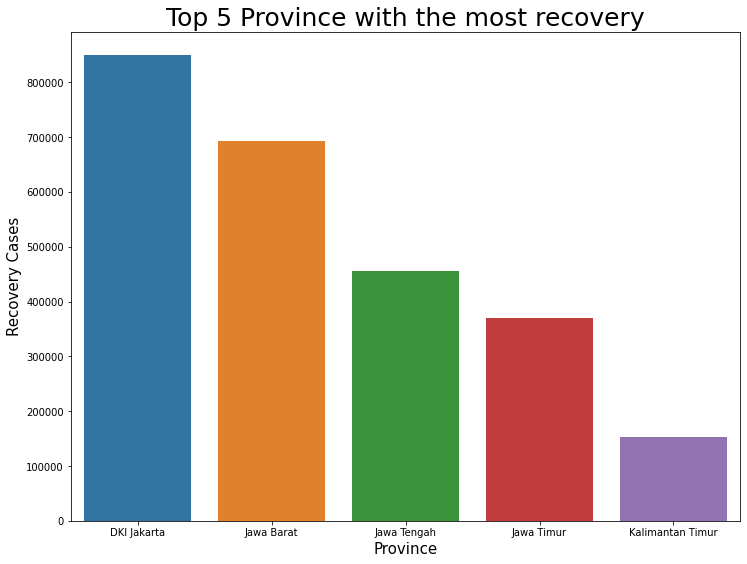

In [ ]:
#Top 5 Province with the most recovery 
plt.figure(figsize=(12,9))
sns.barplot(newest[newest.Location != 'Indonesia'].sort_values(by=['Total Recovered'], ascending=False)['Location'].values[:5],  newest[newest.Location != 'Indonesia'].sort_values(by=['Total Recovered'], ascending=False)['Total Recovered'].values[:5])
plt.title('Top 5 Province with the most recovery', fontsize=25)
plt.xlabel('Province', fontsize=15)
plt.ylabel('Recovery Cases', fontsize=15)
plt.show()

In [23]:
# Creating Table, specifically in DKI Jakarta 
jakarta = data[data.Location == 'DKI Jakarta'].copy()
jakarta

,Date,Location ISO Code,Location,New Cases,New Deaths,New Recovered,New Active Cases,Total Cases,Total Deaths,Total Recovered,...,Population Density,Longitude,Latitude,New Cases per Million,Total Cases per Million,New Deaths per Million,Total Deaths per Million,Total Deaths per 100rb,Case Fatality Rate,Case Recovered Rate
0,3/1/2020,ID-JK,DKI Jakarta,2,0,0,2,39,20,41,...,16334.31,106.836118,-6.204699,0.18,3.60,0.00,1.84,0.18,51.28%,105.13%
1,3/2/2020,ID-JK,DKI Jakarta,2,0,0,2,41,20,41,...,16334.31,106.836118,-6.204699,0.18,3.78,0.00,1.84,0.18,48.78%,100.00%
4,3/3/2020,ID-JK,DKI Jakarta,2,0,0,2,43,20,41,...,16334.31,106.836118,-6.204699,0.18,3.96,0.00,1.84,0.18,46.51%,95.35%
8,3/4/2020,ID-JK,DKI Jakarta,2,0,0,2,45,20,41,...,16334.31,106.836118,-6.204699,0.18,4.15,0.00,1.84,0.18,44.44%,91.11%
12,3/5/2020,ID-JK,DKI Jakarta,0,1,0,-1,45,21,41,...,16334.31,106.836118,-6.204699,0.00,4.15,0.09,1.94,0.19,46.67%,91.11%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21601,11/28/2021,ID-JK,DKI Jakarta,51,0,52,-1,863862,13596,849803,...,16334.31,106.836118,-6.204699,4.70,79646.92,0.00,1253.53,125.35,1.57%,98.37%
21635,11/29/2021,ID-JK,DKI Jakarta,41,0,71,-30,863903,13596,849874,...,16334.31,106.836118,-6.204699,3.78,79650.70,0.00,1253.53,125.35,1.57%,98.38%
21668,11/30/2021,ID-JK,DKI Jakarta,44,0,0,44,863947,13596,849874,...,16334.31,106.836118,-6.204699,4.06,79654.75,0.00,1253.53,125.35,1.57%,98.37%
21701,12/1/2021,ID-JK,DKI Jakarta,70,0,1,69,864017,13596,849875,...,16334.31,106.836118,-6.204699,6.45,79661.21,0.00,1253.53,125.35,1.57%,98.36%


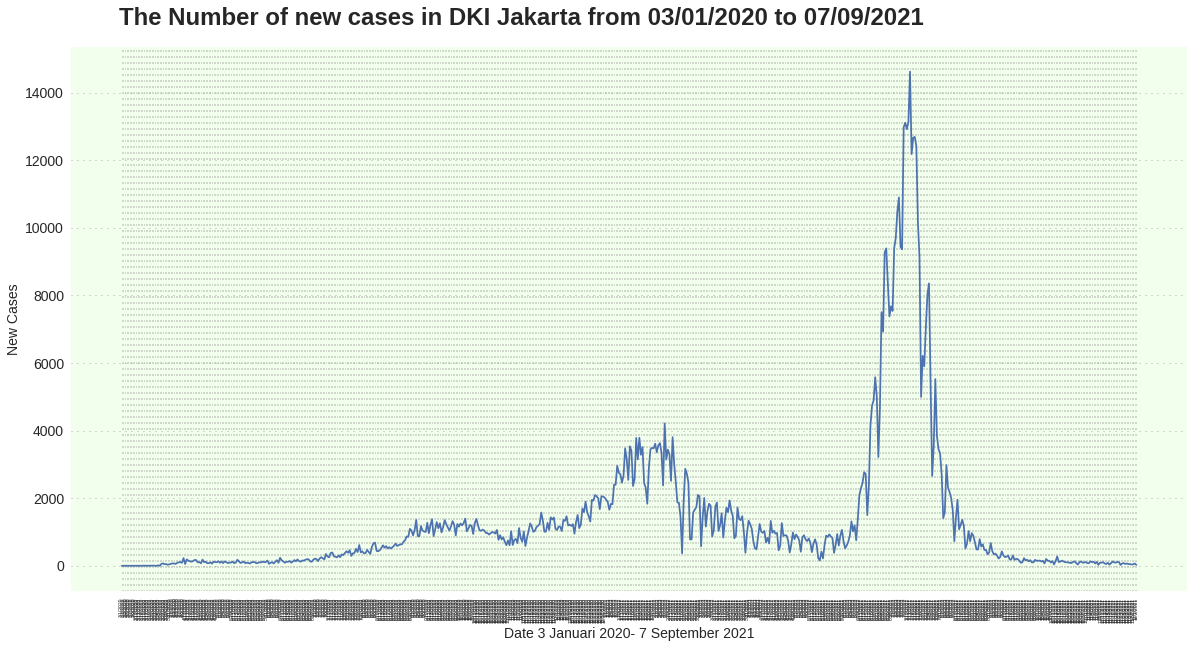

In [33]:
# Number of new cases in DKI Jakarta from 03/01/2020 to 07/09/2021

fig, ax = plt.subplots(1, 1, figsize=(20,10))
ax=sns.lineplot(jakarta['Date'].values ,jakarta['New Cases'].values, sizes=(5,5))
ax.tick_params(axis='x', which='major', labelsize=5, bottom=0.2, rotation=90)
ax.tick_params(axis='y', which='major', labelsize=14, bottom=0.2)

ax.text(x=-2, y=16000, s='The Number of new cases in DKI Jakarta from 03/01/2020 to 07/09/2021', fontsize=24, fontweight='bold')

ax.set_facecolor('#f3ffed')
ax.grid(which="major", axis="y", zorder=0, color="gray", linestyle="-", dashes=(1, 5), alpha=0.6)
ax.grid(which="major", axis="x", zorder=0, color="gray", linestyle="-", dashes=(1, 5), alpha=0.6)

plt.xlabel('Date 3 Januari 2020- 7 September 2021', fontsize=14)
plt.ylabel('New Cases',fontsize=14)
plt.show()

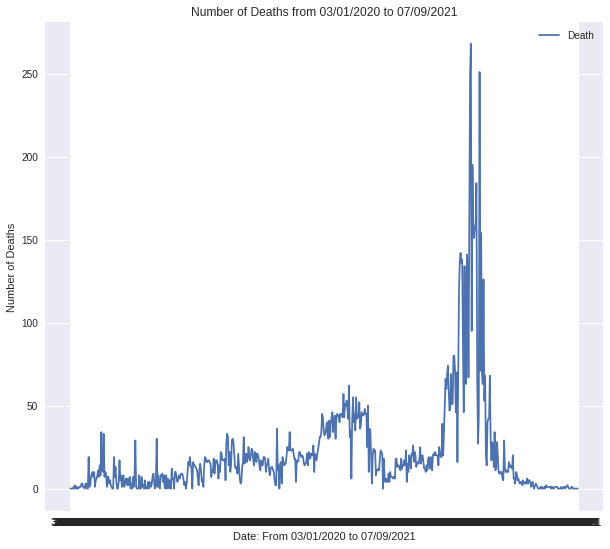

In [ ]:
# Number of Deaths from 03/01/2020 to 07/09/2021
plt.figure(figsize=(10,9))
plt.plot(jakarta['Date'].values, jakarta['New Deaths'].values, label = 'Death')
plt.title('Number of Deaths from 03/01/2020 to 07/09/2021')
plt.xlabel('Date: From 03/01/2020 to 07/09/2021')
plt.ylabel('Number of Deaths')
plt.legend()
plt.show()

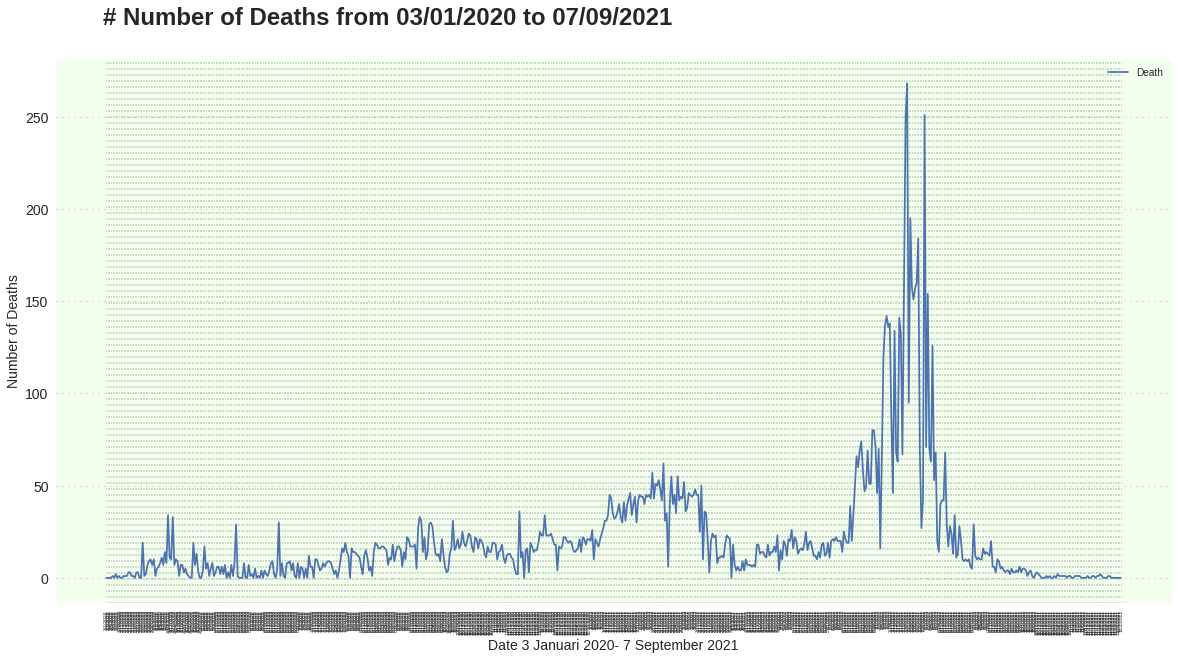

In [43]:
# Number of new cases in DKI Jakarta from 03/01/2020 to 07/09/2021

fig, ax = plt.subplots(1, 1, figsize=(20,10))
ax=sns.lineplot(jakarta['Date'].values ,jakarta['New Deaths'].values,label='Death', sizes=(5,5))
ax.tick_params(axis='x', which='major', labelsize=5, bottom=0.2, rotation=90)
ax.tick_params(axis='y', which='major', labelsize=14, bottom=0.2)

ax.text(x=-2, y=300, s='# Number of Deaths from 03/01/2020 to 07/09/2021', fontsize=24, fontweight='bold')

ax.set_facecolor('#f3ffed')
ax.grid(which="major", axis="y", zorder=0, color="gray", linestyle="-", dashes=(1, 5), alpha=0.6)
ax.grid(which="major", axis="x", zorder=0, color="gray", linestyle="-", dashes=(1, 5), alpha=0.6)

plt.xlabel('Date 3 Januari 2020- 7 September 2021', fontsize=14)
plt.ylabel('Number of Deaths',fontsize=14)
plt.show()

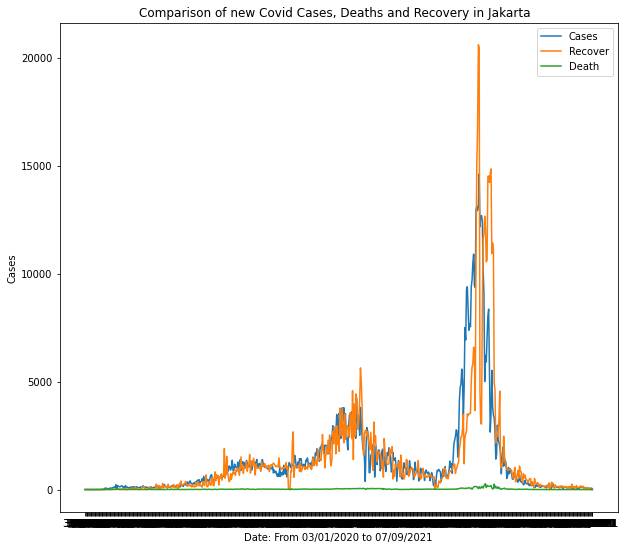

In [ ]:
# Comparison of new Covid Cases, Deaths and Recovery in Jakarta 
plt.figure(figsize=(10,9))
plt.plot(jakarta['Date'].values ,jakarta['New Cases'].values, label='Cases')
plt.plot(jakarta['Date'].values, jakarta['New Recovered'].values, label = 'Recover')
plt.plot(jakarta['Date'].values, jakarta['New Deaths'].values, label = 'Death')
plt.title('Comparison of new Covid Cases, Deaths and Recovery in Jakarta  ')
plt.xlabel('Date: From 03/01/2020 to 07/09/2021')
plt.ylabel('Cases')
plt.legend()
plt.show()

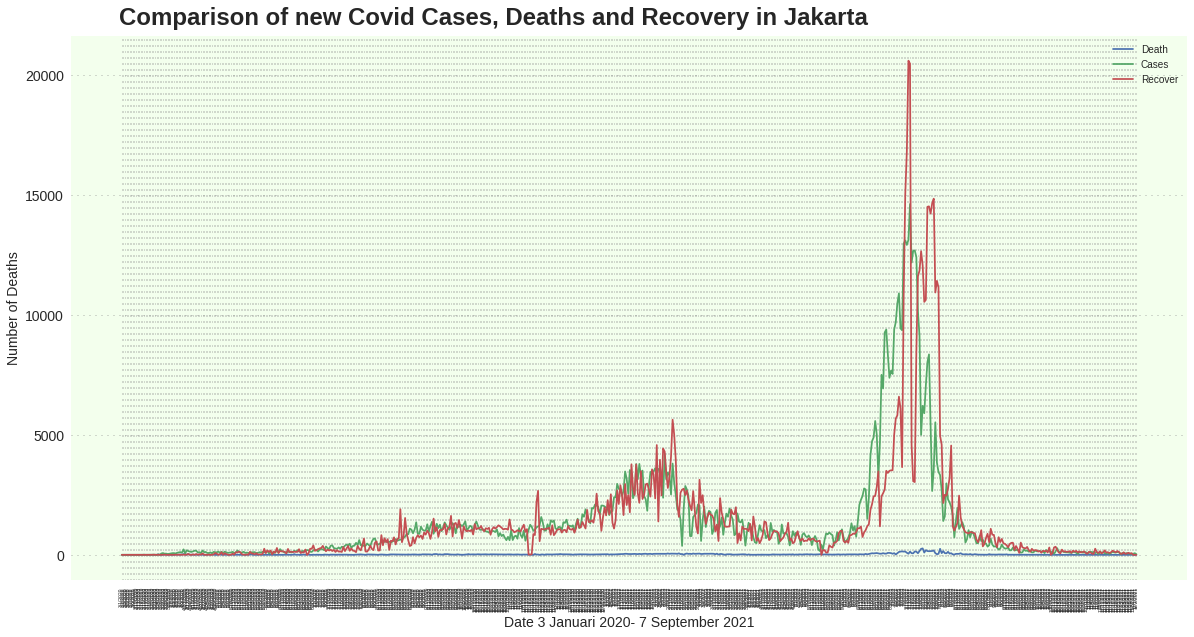

In [56]:
# Number of new cases in DKI Jakarta from 03/01/2020 to 07/09/2021

fig, ax = plt.subplots(1, 1, figsize=(20,10))
ax=sns.lineplot(jakarta['Date'].values ,jakarta['New Deaths'].values,label='Death', sizes=(5,5))
ax=sns.lineplot(jakarta['Date'].values ,jakarta['New Cases'].values, label='Cases',sizes=(5,5))
ax=sns.lineplot(jakarta['Date'].values, jakarta['New Recovered'].values, label = 'Recover',sizes=(5,5))

ax.tick_params(axis='x', which='major', labelsize=5, bottom=0.2, rotation=90)
ax.tick_params(axis='y', which='major', labelsize=14, bottom=0.2)

ax.text(x=-2, y=22100, s='Comparison of new Covid Cases, Deaths and Recovery in Jakarta ', fontsize=24, fontweight='bold')

ax.set_facecolor('#f3ffed')
ax.grid(which="major", axis="y", zorder=0, color="gray", linestyle=":", dashes=(1, 5), alpha=0.6)
ax.grid(which="major", axis="x", zorder=0, color="gray", linestyle=":", dashes=(1, 5), alpha=0.6)

plt.xlabel('Date 3 Januari 2020- 7 September 2021', fontsize=14)
plt.ylabel('Number of Deaths',fontsize=14)
plt.show()